# Lab: Joining and Analyzing Movie and Review Data

## 1. Data Preparation and Exploration:

### Load the movies.csv and reviews.csv datasets into pandas dataframes.

In [2]:
import pandas as pd

movies: pd.DataFrame = pd.read_csv("movies.csv")
reviews: pd.DataFrame = pd.read_csv("reviews.csv")

### Display summary statistics and the first few rows of each dataframe to understand their structure.

In [3]:
movies.describe()

,movie_id,release_year
count,100.000000,100.000000
mean,50.500000,2001.670000
std,29.011492,13.758417
min,1.000000,1980.000000
25%,25.750000,1988.000000
50%,50.500000,2001.500000
75%,75.250000,2014.250000
max,100.000000,2023.000000


In [4]:
movies.head()

,movie_id,title,genre,release_year
0,1,The Shawshank Redemption,Drama,1999
1,2,The Godfather,Drama,1987
2,3,The Dark Knight,Drama,1993
3,4,Schindler's List,Crime,2002
4,5,Pulp Fiction,Action,1980


In [5]:
reviews.describe()

,review_id,movie_id,rating
count,300.000000,300.00000,300.000000
mean,150.500000,52.99000,5.328333
std,86.746758,27.98835,2.580354
min,1.000000,1.00000,1.000000
25%,75.750000,29.75000,3.000000
50%,150.500000,54.00000,5.200000
75%,225.250000,76.25000,7.400000
max,300.000000,100.00000,10.000000


In [6]:
reviews.head()

,review_id,movie_id,reviewer,rating,review_date
0,1,96,Jane Doe,8.0,2020-02-17
1,2,90,Victor Scott,1.8,2020-08-22
2,3,32,Yara Baker,1.8,2020-03-10
3,4,77,Victor Scott,5.2,2020-04-24
4,5,16,Mia Martinez,6.3,2020-04-13


## 2. Highest Rated Movies:

### Perform an inner join on the movies and reviews dataframes based on the movie_id column.

In [7]:
movies_and_reviews = pd.merge(movies, reviews, on="movie_id")
movies_and_reviews

,movie_id,title,genre,release_year,review_id,reviewer,rating,review_date
0,1,The Shawshank Redemption,Drama,1999,40,Ivy White,4.4,2020-04-04
1,1,The Shawshank Redemption,Drama,1999,151,Quinn Walker,7.7,2020-01-23
2,1,The Shawshank Redemption,Drama,1999,153,Sophia Allen,9.0,2020-01-27
3,1,The Shawshank Redemption,Drama,1999,167,Henry Harris,8.7,2020-06-17
4,3,The Dark Knight,Drama,1993,129,Uma King,9.8,2020-03-12
...,...,...,...,...,...,...,...,...
295,99,Life of Pi,Action,2017,12,Olivia Clark,4.8,2020-07-23
296,99,Life of Pi,Action,2017,257,Olivia Clark,2.1,2020-04-22
297,100,The Aviator,Sci-Fi,2004,77,Mia Martinez,8.3,2020-01-17
298,100,The Aviator,Sci-Fi,2004,78,Kathy Thompson,6.5,2020-10-13


### Calculate the average rating for each movie.

In [8]:
average_rating_by_movie = movies_and_reviews.groupby("title")["rating"].mean()
average_rating_by_movie

title
3 Idiots              3.300000
A Beautiful Mind      7.625000
A Clockwork Orange    7.300000
Alien                 3.133333
Aliens                5.400000
                        ...   
Vertigo               9.350000
WALL-E                6.000000
Whale Rider           4.250000
Whiplash              7.300000
Your Name             6.250000
Name: rating, Length: 96, dtype: float64

### Identify the top 10 highest-rated movies.

In [9]:
movies_and_reviews.sort_values(by="rating", ascending=False).head(10)

,movie_id,title,genre,release_year,review_id,reviewer,rating,review_date
236,80,A Beautiful Mind,Fantasy,2001,83,Liam Garcia,10.0,2020-06-11
208,73,Full Metal Jacket,Sci-Fi,2011,170,Yara Baker,9.9,2020-04-06
98,37,Oldboy,Sci-Fi,2010,282,Yara Baker,9.9,2020-09-20
235,80,A Beautiful Mind,Fantasy,2001,21,Alice Johnson,9.9,2020-03-25
185,64,Psycho,Action,1985,160,Jane Doe,9.9,2020-02-26
47,20,Interstellar,Fantasy,2021,103,Ryan Hall,9.9,2020-06-29
12,7,Forrest Gump,Biography,2004,31,Frank Wilson,9.8,2020-09-30
260,89,The Wolf of Wall Street,Crime,2006,72,Kathy Thompson,9.8,2020-09-04
4,3,The Dark Knight,Drama,1993,129,Uma King,9.8,2020-03-12
280,94,La La Land,Action,2006,131,Charlie Davis,9.7,2020-08-11


### Display the titles and average ratings of these top 10 movies.

In [10]:
average_rating_by_movie.sort_values(ascending=False).head(10)

title
The Dark Knight            9.800
Vertigo                    9.350
City Lights                9.250
Jaws                       8.600
Grave of the Fireflies     8.000
Scarface                   8.000
The Empire Strikes Back    8.000
North by Northwest         7.650
A Beautiful Mind           7.625
Oldboy                     7.500
Name: rating, dtype: float64

## 3. Genre Analysis:

### Group the joined dataframe by genre and calculate the average rating for each genre.

In [11]:
average_rating_by_genre =  movies_and_reviews.groupby("genre")["rating"].mean()
average_rating_by_genre

genre
Action       5.109375
Biography    5.279310
Crime        4.901493
Drama        5.204478
Fantasy      5.768421
Sci-Fi       6.118421
Name: rating, dtype: float64

### Determine which genre has the highest average rating.

In [12]:
average_rating_by_genre.idxmax()

'Sci-Fi'

### Display the genres along with their average ratings.

In [13]:
average_rating_by_genre

genre
Action       5.109375
Biography    5.279310
Crime        4.901493
Drama        5.204478
Fantasy      5.768421
Sci-Fi       6.118421
Name: rating, dtype: float64

## 4. Reviewer Analysis:

### Identify the top 5 reviewers who have given the most reviews.

In [46]:
review_count_by_reviewer = reviews.groupby("reviewer")["review_id"].count()
sorted_review_count_by_reviewer = review_count_by_reviewer.sort_values(ascending=False).head(5)
sorted_review_count_by_reviewer

reviewer
Tom Young       18
Uma King        16
Henry Harris    15
John Smith      14
Yara Baker      13
Name: review_id, dtype: int64

### Calculate the average rating given by each of these top 5 reviewers.

In [78]:
reviews.groupby("reviewer")["rating"].agg(['count','mean']).sort_values(by="count",ascending=False).head(5)

,count,mean
reviewer,,
Tom Young,18,5.400000
Uma King,16,5.500000
Henry Harris,15,4.473333
John Smith,14,4.542857
Yara Baker,13,5.707692


### Display the reviewer names and their average ratings.

## 5. Time-Based Analysis:

### Analyze how movie ratings have changed over time.

### Group the joined dataframe by the month extracted from the review_date column and calculate the average rating for each month.

In [86]:
# extract the month from the review_date and make a new column "review_month" with it
movies_and_reviews["review_date"] = pd.to_datetime(movies_and_reviews["review_date"])
movies_and_reviews["review_month"] = movies_and_reviews["review_date"].dt.month

# calculate the average rating for each month
movies_and_reviews.groupby("review_month")["rating"].mean()

review_month
1     5.209677
2     4.755172
3     5.583871
4     5.213333
5     6.048387
6     5.623333
7     5.338710
8     4.858065
9     5.456667
10    5.138462
Name: rating, dtype: float64

### Create a line plot showing the trend of average movie ratings over time.

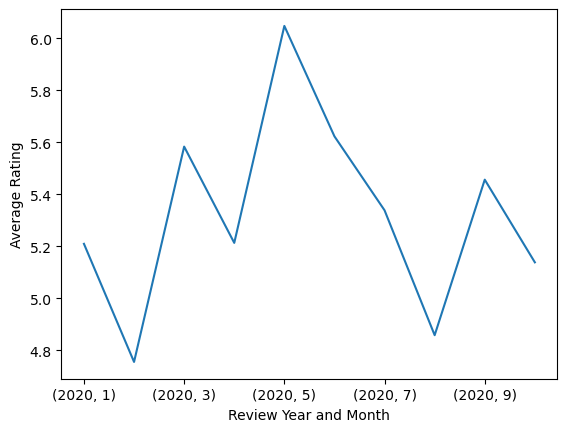

In [237]:
import matplotlib.pyplot as plt

# extract the year from the review_date and make a new column "review_year" with it
movies_and_reviews["review_year"] = movies_and_reviews["review_date"].dt.year
movies_and_reviews.groupby(["review_year", "review_month"])["rating"].mean().plot(
    kind="line", xlabel="Review Year and Month", ylabel="Average Rating"
)
plt.show()

### Discuss any observable trends.

- The average rating has its peak in the middle of the year, especially in May.
- The nearer the beginning and end of the year, the lower the average rating tends to be.

In [238]:
movies_and_reviews.groupby(["review_year","review_month"])["rating"].count()

review_year  review_month
2020         1               31
             2               29
             3               31
             4               30
             5               31
             6               30
             7               31
             8               31
             9               30
             10              26
Name: rating, dtype: int64

According to the above table, there is no big difference in the number of reviews among the month.

The average rating in the middle of the year tends to be higher than the beginning and end of the year.

## 6. Movies with Most Reviews:

### Identify the top 10 movies that have received the most reviews.

### Display the titles of these movies along with the number of reviews they have received.

In [239]:
movies_and_reviews.groupby("title")["review_id"].count().sort_values(ascending=False).head(10)

title
Full Metal Jacket        7
Interstellar             7
Paths of Glory           6
It's a Wonderful Life    6
Memento                  6
The Truman Show          6
Shutter Island           6
The Revenant             6
Capernaum                6
The Hunt                 5
Name: review_id, dtype: int64

## 7. Distribution of Ratings:

### Create a histogram to visualize the distribution of ratings.

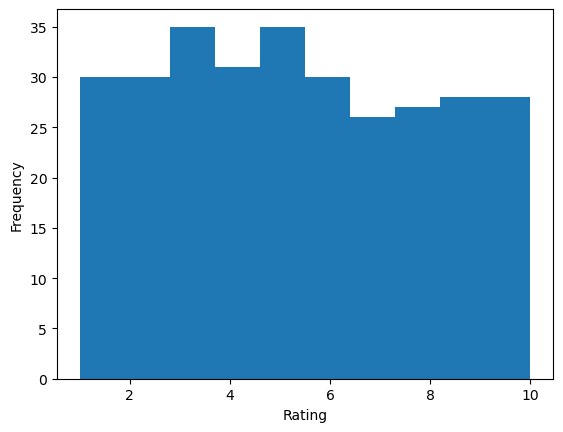

In [240]:
movies_and_reviews["rating"].plot(kind="hist",xlabel="Rating")
plt.show()

### Analyze the distribution and discuss any skewness or patterns observed in the ratings.

It seems that most movie ratings fall between 2 and 7, with a balanced spread of reviews across all rating categories.

## 8. Impact of Release Year:

### Analyze if there is any correlation between the release year of a movie and its average rating.

### Create a scatter plot showing the relationship between the release year and the average rating.

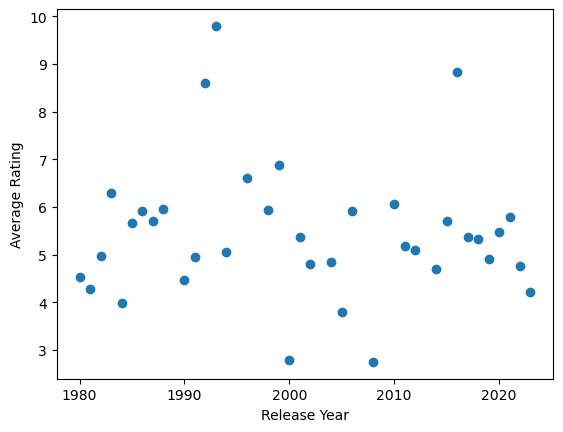

In [241]:
average_rating_by_release_year = movies_and_reviews.groupby("release_year")[
    "rating"
].mean()
plt.scatter(x=average_rating_by_release_year.index, y=average_rating_by_release_year)
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.show()

### Discuss any observable patterns or correlations.

It seems the average rating is almost steady throughout the time.
There isn't any relationship between them.

## 9. Reviewer Consistency:

### For each reviewer, calculate the standard deviation of their ratings.

In [242]:
rating_std_by_reviewer = movies_and_reviews.groupby("reviewer")["rating"].std()
rating_std_by_reviewer

reviewer
Alice Johnson     3.293094
Bob Brown         2.961681
Charlie Davis     2.205145
Emily Evans       2.277645
Frank Wilson      2.596618
Grace Lee         2.192273
Henry Harris      2.610273
Ivy White         1.875449
Jack Martin       2.849389
Jane Doe          2.718823
John Smith        2.127373
Kathy Thompson    2.426857
Liam Garcia       2.314586
Mia Martinez      2.092773
Noah Robinson     1.773415
Olivia Clark      2.438290
Paul Lewis        1.913984
Quinn Walker      2.323360
Ryan Hall         2.221255
Sophia Allen      2.719473
Tom Young         2.556652
Uma King          2.742748
Victor Scott      1.940003
Wendy Green       2.708807
Xander Adams      2.214598
Yara Baker        3.128221
Zane Carter       3.567718
Name: rating, dtype: float64

### Identify the most and least consistent reviewers based on the standard deviation of their ratings.
### Display the names of these reviewers along with their standard deviations.

- The most consistent reviewers

In [243]:
rating_std_by_reviewer.sort_values(ascending=True).head(5)

reviewer
Noah Robinson    1.773415
Ivy White        1.875449
Paul Lewis       1.913984
Victor Scott     1.940003
Mia Martinez     2.092773
Name: rating, dtype: float64

- The least consistent reviewers

In [244]:
rating_std_by_reviewer.sort_values(ascending=False).head(5)

reviewer
Zane Carter      3.567718
Alice Johnson    3.293094
Yara Baker       3.128221
Bob Brown        2.961681
Jack Martin      2.849389
Name: rating, dtype: float64

## 10. Challenge Task - Genre Popularity Over Time:

### Analyze how the popularity of different genres has changed over time.

### Group the joined dataframe by genre and the year extracted from the review_date column.

In [245]:
movies_and_reviews_group_by_genre_and_year =  movies_and_reviews.groupby(["genre","review_year"])

### Calculate the number of reviews for each genre per month.

In [246]:
number_of_review_for_genre = movies_and_reviews.groupby(["genre","review_month"])["review_id"].count()
number_of_review_for_genre

genre      review_month
Action     1               1
           2               4
           3               3
           4               7
           5               1
           6               6
           7               4
           8               3
           9               3
Biography  1               8
           2               3
           3               8
           4               4
           5               6
           6               5
           7               5
           8               7
           9               6
           10              6
Crime      1               8
           2               5
           3               6
           4               7
           5               9
           6               5
           7               7
           8               7
           9               6
           10              7
Drama      1               7
           2               9
           3               5
           4               6
           5       

### Create a line plot for each genre showing the number of reviews over time.

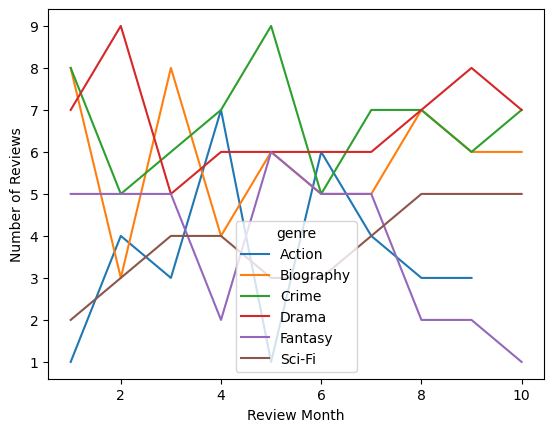

In [247]:
number_of_review_for_genre.unstack().transpose().plot(kind="line",xlabel="Review Month",ylabel="Number of Reviews")
plt.show()

### Discuss any trends or shifts in genre popularity over time.

Based on the number of reviews...

In [248]:
number_of_review_for_genre.unstack().transpose().std().sort_values()


genre
Sci-Fi       1.032796
Drama        1.159502
Crime        1.251666
Biography    1.619328
Fantasy      1.813529
Action       2.006932
dtype: float64

According to the chart and the standard deviation above, 
- "Sci-Fi" has the most consistent popularity based on the number of reviews.
- "Crime" and "Drama" stays at higher rate than others over time.

Also, based on the average rating...

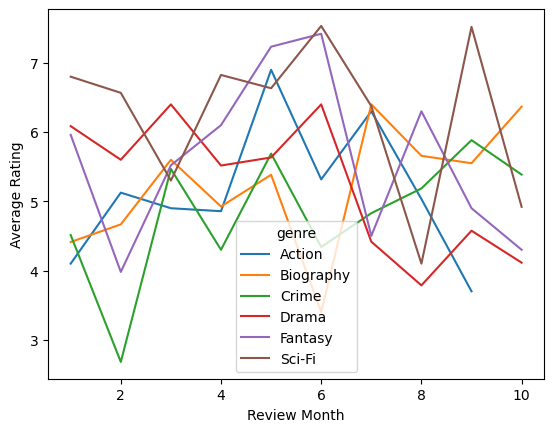

In [249]:
average_rating_for_genre_in_each_month = movies_and_reviews.groupby(["genre","review_month"])["rating"].mean()
average_rating_for_genre_in_each_month.unstack().transpose().plot(kind="line",xlabel="Review Month",ylabel="Average Rating")
plt.show()

In [250]:
average_rating_for_genre_in_each_month.unstack().transpose().std().sort_values()

genre
Biography    0.914900
Crime        0.938801
Drama        0.958468
Action       0.986074
Sci-Fi       1.127888
Fantasy      1.195641
dtype: float64

According to the chart above
- "Biography" has the most consistent popularity based on the average rating.
- "Action" and "Drama" hold steady in terms of audience reception.